In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from time import time
import re
import string
import os
from pprint import pprint
import collections
import gensim
import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)

/Users/aemensultan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df = pd.read_csv("sample.csv", error_bad_lines=False)
#df.info()

b'Skipping line 6: expected 17 fields, saw 23\nSkipping line 8: expected 17 fields, saw 18\nSkipping line 12: expected 17 fields, saw 21\nSkipping line 16: expected 17 fields, saw 29\nSkipping line 17: expected 17 fields, saw 22\nSkipping line 18: expected 17 fields, saw 20\nSkipping line 20: expected 17 fields, saw 48\nSkipping line 26: expected 17 fields, saw 22\nSkipping line 29: expected 17 fields, saw 18\nSkipping line 32: expected 17 fields, saw 19\nSkipping line 34: expected 17 fields, saw 20\nSkipping line 37: expected 17 fields, saw 22\nSkipping line 51: expected 17 fields, saw 20\nSkipping line 54: expected 17 fields, saw 37\nSkipping line 56: expected 17 fields, saw 20\nSkipping line 61: expected 17 fields, saw 18\nSkipping line 63: expected 17 fields, saw 27\nSkipping line 69: expected 17 fields, saw 48\nSkipping line 71: expected 17 fields, saw 18\nSkipping line 74: expected 17 fields, saw 20\nSkipping line 78: expected 17 fields, saw 22\nSkipping line 81: expected 17 fiel

b'Skipping line 36306: expected 17 fields, saw 25\nSkipping line 36406: expected 17 fields, saw 23\nSkipping line 36472: expected 17 fields, saw 28\nSkipping line 36506: expected 17 fields, saw 20\nSkipping line 36555: expected 17 fields, saw 20\nSkipping line 36566: expected 17 fields, saw 20\nSkipping line 36569: expected 17 fields, saw 19\nSkipping line 36597: expected 17 fields, saw 21\nSkipping line 36602: expected 17 fields, saw 32\nSkipping line 36635: expected 17 fields, saw 20\nSkipping line 36640: expected 17 fields, saw 36\nSkipping line 36655: expected 17 fields, saw 26\nSkipping line 36691: expected 17 fields, saw 25\nSkipping line 36723: expected 17 fields, saw 24\nSkipping line 36755: expected 17 fields, saw 24\nSkipping line 36794: expected 17 fields, saw 23\nSkipping line 36801: expected 17 fields, saw 21\nSkipping line 36809: expected 17 fields, saw 24\nSkipping line 36815: expected 17 fields, saw 34\nSkipping line 36829: expected 17 fields, saw 25\nSkipping line 3683

In [4]:
df.dropna()

,Id,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,productCategory,US_reviewTextLength,US_summaryLength,US_timestamp,US_reviewAgeDays,US_reviewTextSentiment,label_int,overall_int
0,97934,False,"10 11, 1997",A10JPZB33OE7B5,0061555819,EJ Reed,This book was a disappointment actually. I'd ...,Not the best that I've read.,876528000,books,288,28,1997-10-11T00:00:00.000Z,7751.0,-0.1163,1.0,3.0
1,146028937646,False,"01 10, 1998",A1E8XPKV5E8MID,0736922172,Techie customer,John ankerberg would have a good book here if ...,Masonry called to question,884390400,books,340,26,1998-01-10T00:00:00.000Z,7660.0,0.8399,1.0,5.0
2,60129646169,False,"02 6, 1998",A3PHY8BFZ0KSTA,0821223232,Amazon Customer,Buy this collection. It is testament to the po...,"David Plowden's \Imprint\"" is a modern classic.""",886723200,books,164,46,1998-02-06T00:00:00.000Z,7633.0,0.6369,1.0,5.0
3,60129659740,False,"03 9, 1998",A1Z6A5E6VKCMCZ,0886774616,KitchenSharkMama,These are great stories not only for cat peopl...,A delightful collection of shorts!,889401600,books,374,34,1998-03-09T00:00:00.000Z,7602.0,0.9806,0.0,5.0
4,17179928241,False,"06 25, 1998",AOV9AIX4UE5BB,0385480016,Marion,This book cures writer's block and helps you g...,"Utterly funky, fun and fabulously encouraging!",898732800,books,299,46,1998-06-25T00:00:00.000Z,7494.0,0.7897,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,85899743874,True,"12 25, 2017",A11WH1FF9HP3GR,B015J83ACM,Michelle Smith,"Nice material, awesome color, great length. Ex...",Five Stars,1514160000,home_kitchen,65,10,2017-12-25T00:00:00.000Z,371.0,0.9001,0.0,5.0
59995,85899804323,True,"12 25, 2017",A2XOWW1ZLOFZD7,B018A5I6P2,myfriendbarley,Love these drapes (even though I ordered the w...,Love these drapes (even though I ordered the w...,1514160000,home_kitchen,143,58,2017-12-25T00:00:00.000Z,371.0,0.8126,0.0,5.0
59996,77309426133,True,"12 25, 2017",A3T6XM2VQ7HDZ6,B001EU9UTM,Carreer,When I originally reviewed this product I was ...,Five Star,1514160000,home_kitchen,403,9,2017-12-25T00:00:00.000Z,371.0,0.8451,1.0,5.0
59997,77309465464,True,"12 25, 2017",A3QSMGF3TR4RSB,B001OE6WHG,virtueofpatience,My bird hit smack in the window right after I ...,Didn't work for us.,1514160000,home_kitchen,58,19,2017-12-25T00:00:00.000Z,371.0,0.0000,0.0,2.0


In [5]:
df = df[df['label_int'] == 1]
df.head()

,Id,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,productCategory,US_reviewTextLength,US_summaryLength,US_timestamp,US_reviewAgeDays,US_reviewTextSentiment,label_int,overall_int
0,97934,False,"10 11, 1997",A10JPZB33OE7B5,0061555819,EJ Reed,This book was a disappointment actually. I'd ...,Not the best that I've read.,876528000,books,288,28,1997-10-11T00:00:00.000Z,7751.0,-0.1163,1.0,3.0
1,146028937646,False,"01 10, 1998",A1E8XPKV5E8MID,0736922172,Techie customer,John ankerberg would have a good book here if ...,Masonry called to question,884390400,books,340,26,1998-01-10T00:00:00.000Z,7660.0,0.8399,1.0,5.0
2,60129646169,False,"02 6, 1998",A3PHY8BFZ0KSTA,0821223232,Amazon Customer,Buy this collection. It is testament to the po...,"David Plowden's \Imprint\"" is a modern classic.""",886723200,books,164,46,1998-02-06T00:00:00.000Z,7633.0,0.6369,1.0,5.0
7,17180065633,False,"10 2, 1998",A1D405XK6K0PZW,0451454537,Amazon Customer,But not in this book. At last a novel that put...,The good guys almost always win...,907286400,books,651,34,1998-10-02T00:00:00.000Z,7395.0,0.4113,1.0,5.0
9,120259213895,True,"10 26, 1998",A26MCYH6Q4JQR2,0316545317,"Philip H Newman, MD","A wonderful, engaging, coherent look at a rema...",Mavelous review of the medieval excesses,909360000,books,297,40,1998-10-26T00:00:00.000Z,7371.0,0.4228,1.0,5.0


#### Product Categories

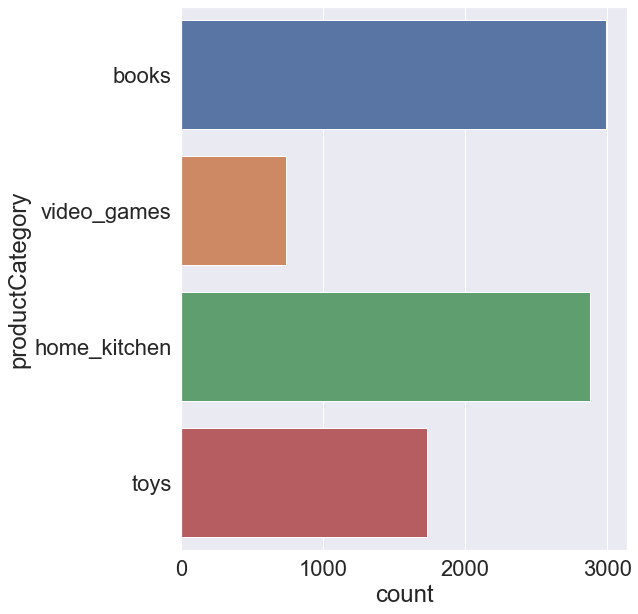

In [7]:
plt.figure(figsize=(8,10))
sns.set(font_scale=2)  
ax = sns.countplot(y="productCategory", data=df)

In [8]:
X = df['reviewText']
y = df['US_reviewTextSentiment']

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aemensultan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import string

def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

#  Checking if the function works correctly
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [11]:
bow = CountVectorizer(analyzer = text_process)

In [12]:
X = bow.fit_transform(X)

In [13]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print("Density: {}".format((density)))

Shape of Sparse Matrix:  (8349, 44445)
Amount of Non-Zero occurrences:  407926
Density: 0.10993197116117615


In [14]:
import string
from nltk import word_tokenize
stopwords = set(stopwords.words('english'))

def clean(txt):
    txt = word_tokenize(txt)
    txt = [word.lower() for word in txt if word.isalpha()]
    punct = str.maketrans('','', string.punctuation)
    txt = [word.translate(punct) for word in txt]
    txt = [word for word in txt if not word in stopwords]
    return txt

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aemensultan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['reviewText'] = df['reviewText'].apply(clean)

#### Common Words

In [17]:
from collections import Counter

def counter(txt):
    cnt = Counter()
    for msgs in txt:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

In [18]:
txt_cnt = counter(df['reviewText'])

In [19]:
txt_cnt.most_common(20)

[('book', 5147),
 ('one', 4246),
 ('like', 3316),
 ('game', 3012),
 ('would', 2729),
 ('great', 2672),
 ('get', 2292),
 ('good', 2210),
 ('really', 2189),
 ('well', 2092),
 ('love', 2022),
 ('read', 1989),
 ('time', 1932),
 ('much', 1871),
 ('also', 1862),
 ('story', 1704),
 ('even', 1664),
 ('use', 1599),
 ('little', 1542),
 ('first', 1445)]

<AxesSubplot:xlabel='Counts', ylabel='Words'>

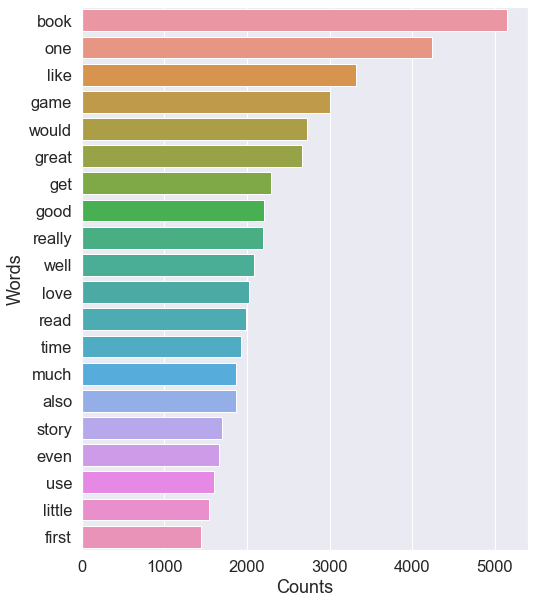

In [20]:
common_words = txt_cnt.most_common(20)
common_words = pd.DataFrame(common_words, columns = ['Words', 'Counts'])
plt.figure(figsize = (8,10))
sns.set(font_scale=1.5)  
sns.barplot(y="Words", x="Counts", data=common_words)

##add label 

In [28]:
common = txt_cnt.most_common(30)
common = pd.DataFrame(common)

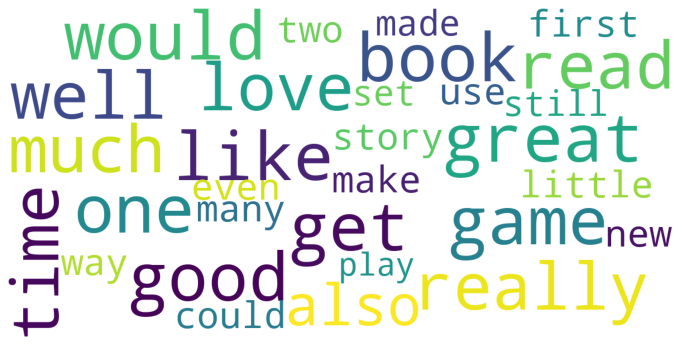

In [29]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(common)

#### Sentiment Analysis

In [21]:
conditions = [(df['US_reviewTextSentiment'] < 0),
             (df['US_reviewTextSentiment'] == 0),
             (df['US_reviewTextSentiment'] > 0)]

values = ['Negative', 'Neutral', 'Positive']

df['Sentiment'] = np.select(conditions, values)

In [22]:
df.head()

,Id,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,productCategory,US_reviewTextLength,US_summaryLength,US_timestamp,US_reviewAgeDays,US_reviewTextSentiment,label_int,overall_int,Sentiment
0,97934,False,"10 11, 1997",A10JPZB33OE7B5,0061555819,EJ Reed,"[book, disappointment, actually, expected, som...",Not the best that I've read.,876528000,books,288,28,1997-10-11T00:00:00.000Z,7751.0,-0.1163,1.0,3.0,Negative
1,146028937646,False,"01 10, 1998",A1E8XPKV5E8MID,0736922172,Techie customer,"[john, ankerberg, would, good, book, overstate...",Masonry called to question,884390400,books,340,26,1998-01-10T00:00:00.000Z,7660.0,0.8399,1.0,5.0,Positive
2,60129646169,False,"02 6, 1998",A3PHY8BFZ0KSTA,0821223232,Amazon Customer,"[buy, collection, testament, power, elegant, p...","David Plowden's \Imprint\"" is a modern classic.""",886723200,books,164,46,1998-02-06T00:00:00.000Z,7633.0,0.6369,1.0,5.0,Positive
7,17180065633,False,"10 2, 1998",A1D405XK6K0PZW,0451454537,Amazon Customer,"[book, last, novel, puts, end, high, fantasy, ...",The good guys almost always win...,907286400,books,651,34,1998-10-02T00:00:00.000Z,7395.0,0.4113,1.0,5.0,Positive
9,120259213895,True,"10 26, 1998",A26MCYH6Q4JQR2,0316545317,"Philip H Newman, MD","[wonderful, engaging, coherent, look, remarkab...",Mavelous review of the medieval excesses,909360000,books,297,40,1998-10-26T00:00:00.000Z,7371.0,0.4228,1.0,5.0,Positive


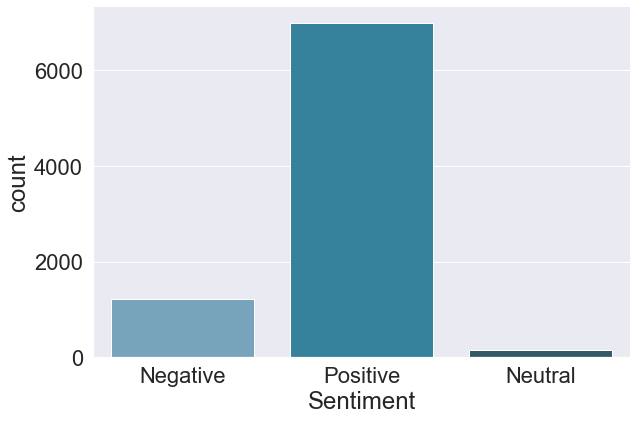

In [23]:
sns.set(font_scale=2)  
sns.factorplot(x="Sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

In [25]:
df.US_reviewTextSentiment.quantile([0.20,0.40,0.60,0.80])

0.2    0.27446
0.4    0.77258
0.6    0.91070
0.8    0.96780
Name: US_reviewTextSentiment, dtype: float64

In [26]:
conds = [df.US_reviewTextSentiment.between(-1,0.27446), 
         df.US_reviewTextSentiment.between(0.27446,0.77258),
         df.US_reviewTextSentiment.between(0.77258,0.91070), 
         df.US_reviewTextSentiment.between(0.91070,0.96780),
         df.US_reviewTextSentiment.between(0.96780,1)]


choices = [1,2,3,4,5]


df['Score'] = np.select(conds,choices)
df.head()


,Id,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,productCategory,US_reviewTextLength,US_summaryLength,US_timestamp,US_reviewAgeDays,US_reviewTextSentiment,label_int,overall_int,Sentiment,Score
0,97934,False,"10 11, 1997",A10JPZB33OE7B5,0061555819,EJ Reed,"[book, disappointment, actually, expected, som...",Not the best that I've read.,876528000,books,288,28,1997-10-11T00:00:00.000Z,7751.0,-0.1163,1.0,3.0,Negative,1
1,146028937646,False,"01 10, 1998",A1E8XPKV5E8MID,0736922172,Techie customer,"[john, ankerberg, would, good, book, overstate...",Masonry called to question,884390400,books,340,26,1998-01-10T00:00:00.000Z,7660.0,0.8399,1.0,5.0,Positive,3
2,60129646169,False,"02 6, 1998",A3PHY8BFZ0KSTA,0821223232,Amazon Customer,"[buy, collection, testament, power, elegant, p...","David Plowden's \Imprint\"" is a modern classic.""",886723200,books,164,46,1998-02-06T00:00:00.000Z,7633.0,0.6369,1.0,5.0,Positive,2
7,17180065633,False,"10 2, 1998",A1D405XK6K0PZW,0451454537,Amazon Customer,"[book, last, novel, puts, end, high, fantasy, ...",The good guys almost always win...,907286400,books,651,34,1998-10-02T00:00:00.000Z,7395.0,0.4113,1.0,5.0,Positive,2
9,120259213895,True,"10 26, 1998",A26MCYH6Q4JQR2,0316545317,"Philip H Newman, MD","[wonderful, engaging, coherent, look, remarkab...",Mavelous review of the medieval excesses,909360000,books,297,40,1998-10-26T00:00:00.000Z,7371.0,0.4228,1.0,5.0,Positive,2


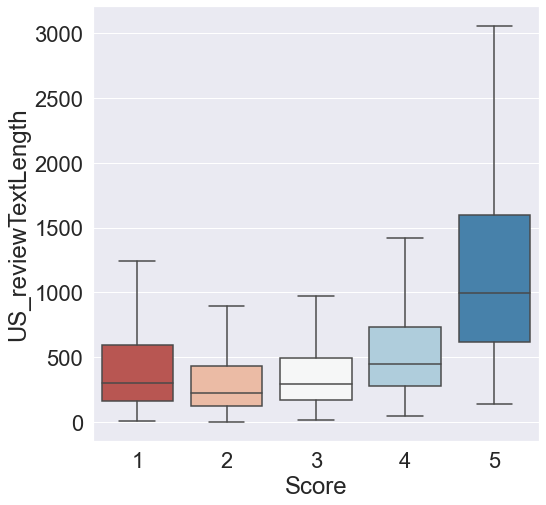

In [27]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=2)  
sns.boxplot(x='Score',y='US_reviewTextLength', data=df, palette='RdBu', showfliers=False)
plt.show()

### TOPIC MODELING

In [30]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models
import gensim

In [31]:
tokenizer = RegexpTokenizer(r'\w+')

In [32]:
df['reviewText'].astype(str)

0        ['book', 'disappointment', 'actually', 'expect...
1        ['john', 'ankerberg', 'would', 'good', 'book',...
2        ['buy', 'collection', 'testament', 'power', 'e...
7        ['book', 'last', 'novel', 'puts', 'end', 'high...
9        ['wonderful', 'engaging', 'coherent', 'look', ...
                               ...                        
59946    ['bought', 'twin', 'protector', 'year', 'old',...
59953    ['another', 'successful', 'novel', 'hosteen', ...
59976    ['looks', 'great', 'putting', 'together', 'too...
59992    ['blindsided', 'lizzie', 'first', 'stormed', '...
59996    ['originally', 'reviewed', 'product', 'less', ...
Name: reviewText, Length: 8349, dtype: object

In [33]:
doc_1 = df.reviewText
doc_1

0        [book, disappointment, actually, expected, som...
1        [john, ankerberg, would, good, book, overstate...
2        [buy, collection, testament, power, elegant, p...
7        [book, last, novel, puts, end, high, fantasy, ...
9        [wonderful, engaging, coherent, look, remarkab...
                               ...                        
59946    [bought, twin, protector, year, old, daughter,...
59953    [another, successful, novel, hosteen, chappell...
59976    [looks, great, putting, together, took, someti...
59992    [blindsided, lizzie, first, stormed, brothers,...
59996    [originally, reviewed, product, less, enthusia...
Name: reviewText, Length: 8349, dtype: object

In [34]:
#plotting tools
import pyLDAvis
import pyLDAvis.gensim #dont skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
reindexed_data = df['reviewText']
reindexed_data.index = df['Id']
reindexed_data 

/Users/aemensultan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Id
97934           [book, disappointment, actually, expected, som...
146028937646    [john, ankerberg, would, good, book, overstate...
60129646169     [buy, collection, testament, power, elegant, p...
17180065633     [book, last, novel, puts, end, high, fantasy, ...
120259213895    [wonderful, engaging, coherent, look, remarkab...
                                      ...                        
77309520419     [bought, twin, protector, year, old, daughter,...
25770145591     [another, successful, novel, hosteen, chappell...
85899787194     [looks, great, putting, together, took, someti...
42949788266     [blindsided, lizzie, first, stormed, brothers,...
77309426133     [originally, reviewed, product, less, enthusia...
Name: reviewText, Length: 8349, dtype: object

In [36]:
#gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
spacy.cli.download("en")

/Users/aemensultan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/aemensultan/opt/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/Users/aemensultan/opt/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [51]:
# tokenize using gensims simple_preprocess
def sent_to_words(sentences, deacc=True):  # deacc=True removes punctuations
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))

# conver to list
data=df['reviewText'].values.tolist()
data_words=list(sent_to_words(data))

#sample
print(data_words[3])

['book', 'last', 'novel', 'puts', 'end', 'high', 'fantasy', 'heroes', 'always', 'victorious', 'forces', 'evil', 'orcs', 'get', 'deserve', 'character', 'still', 'cannonfodder', 'say', 'content', 'role', 'dumb', 'stupid', 'expendable', 'like', 'weird', 'stuff', 'attitude', 'novel', 'right', 'one', 'actually', 'facial', 'muscles', 'hurt', 'finished', 'reading', 'grunts', 'constant', 'grin', 'face', 'expect', 'hard', 'swearing', 'commanded', 'good', 'novel', 'like']


In [52]:
stop_words= stopwords.words('english') + list(string.punctuation)

In [53]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts,allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out=[]
    for sent in texts:
        doc=nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [54]:
# remove stop words
data_words_npstops= remove_stopwords(data_words)

nlp=spacy.load('en',disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized=lemmatization(data_words_npstops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['book', 'last', 'novel', 'put', 'end', 'high', 'fantasy', 'hero', 'always', 'victorious', 'force', 'evil', 'orcs', 'get', 'deserve', 'character', 'still', 'say', 'content', 'role', 'dumb', 'stupid', 'expendable', 'weird', 'stuff', 'attitude', 'novel', 'right', 'actually', 'facial', 'muscle', 'hurt', 'finish', 'reading', 'grunt', 'constant', 'grin', 'face', 'expect', 'hard', 'swear', 'command', 'good', 'novel']


In [56]:
# create dictionary
id2word=corpora.Dictionary(data_lemmatized)

# create corpus
corpus=[id2word.doc2bow(text) for text in data_lemmatized]

#sample
print(corpus[2])

[(41, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1)]


In [57]:
# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus= corpus,id2word=id2word,num_topics=10,random_state=100,\
                                          update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)





In [73]:
# print the 10 topics
topics = lda_model2.print_topics()
topics



[(0,
  '0.019*"learn" + 0.018*"brand" + 0.011*"people" + 0.011*"book" + 0.011*"result" + 0.011*"understand" + 0.010*"many" + 0.009*"question" + 0.009*"history" + 0.008*"disappointed"'),
 (1,
  '0.023*"great" + 0.022*"look" + 0.020*"game" + 0.016*"buy" + 0.015*"set" + 0.014*"play" + 0.013*"easy" + 0.012*"get" + 0.011*"well" + 0.011*"good"'),
 (2,
  '0.064*"color" + 0.032*"picture" + 0.030*"soft" + 0.019*"cook" + 0.016*"black" + 0.016*"pan" + 0.015*"replace" + 0.014*"push" + 0.014*"edge" + 0.014*"pot"'),
 (3,
  '0.072*"use" + 0.028*"product" + 0.019*"small" + 0.015*"size" + 0.015*"plastic" + 0.015*"bed" + 0.014*"bag" + 0.013*"quality" + 0.013*"buy" + 0.012*"hold"'),
 (4,
  '0.105*"book" + 0.057*"read" + 0.043*"story" + 0.024*"character" + 0.023*"life" + 0.019*"write" + 0.016*"author" + 0.015*"enjoy" + 0.012*"world" + 0.011*"live"'),
 (5,
  '0.022*"love" + 0.020*"would" + 0.019*"make" + 0.016*"time" + 0.014*"go" + 0.013*"well" + 0.013*"get" + 0.013*"good" + 0.013*"really" + 0.011*"work"')

In [82]:
# coherence score
coherence_model_lda=CoherenceModel(model=lda_model2,texts=data_lemmatized,dictionary=id2word,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.41421511989364285


In [77]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.332723 -0.011674       1        1  38.791800
1      0.309801  0.068960       2        1  25.658953
4      0.044374 -0.344460       3        1  10.861341
3      0.107131  0.226399       4        1   8.432719
0     -0.045630 -0.167318       5        1   5.266444
2     -0.127940  0.047048       6        1   3.421900
8     -0.148213  0.044319       7        1   2.385288
6     -0.152599  0.049334       8        1   2.316576
9     -0.161254  0.043671       9        1   1.585918
7     -0.158394  0.043722      10        1   1.279060, topic_info=           Term         Freq        Total Category  logprob  loglift
2          book  4698.000000  4698.000000  Default  30.0000  30.0000
470         use  3050.000000  3050.000000  Default  29.0000  29.0000
162        read  2432.000000  2432.000000  Default  28.0000  28.0000
21        story  1846.000000  1846.000000  Default  27.0000  27.0000
2210      color   861.000000   861.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2540     remind    44.266704    45.290973  Topic10  -4.7316   4.3362
3466    healthy    43.983375    45.007710  Topic10  -4.7380   4.3360
2869  happiness    43.304016    44.328107  Topic10  -4.7536   4.3357
2626     golden    39.274341    40.299274  Topic10  -4.8513   4.3333
4914      error    36.092617    37.116844  Topic10  -4.9358   4.3311

[416 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
611       2  0.062307   action
611       3  0.934601   action
869       2  0.998020      add
727       9  0.983429   affect
2270     10  0.979434    alien
...     ...       ...      ...
404       5  0.986495   writer
373       3  0.993201  writing
405       1  0.998948     year
405       2  0.000660     year
786       3  0.995355    young

[466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 4, 1, 3, 9, 7, 10, 8])

In [78]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')